In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob, os, re
import numpy as np 
# from obspy import UTCDateTime
import matplotlib.dates as mdates
from matplotlib import cm, ticker
import datetime as dt 
from datetime import datetime, date

In [2]:
path = '../Results/Detection_fishcall/manual_csv_0.75'

In [3]:
alldf = {'time':[] }
for csvpath in sorted(glob.glob(f'{path}/*csv')):
    df = pd.read_csv(csvpath)
    df = df[df['keep']==True]
    # temp = re.split('[_|.]',csvpath)[-2]
    # yy = '20'+temp[:2]
    # mm = temp[2:4] 
    # dd = temp[4:]
    
    print(csvpath)
    
    for i in range(len(df)):
        begintmp = re.split('[(|)|,]',df['time_min_date'].values[i]); endtmp = re.split('[(|)|,]',df['time_max_date'].values[i])
        tr_begin = datetime(int(begintmp[1]),int(begintmp[2]),int(begintmp[3]),int(begintmp[4]),int(begintmp[5]),int(begintmp[6]),int(begintmp[7]))
        tr_end = datetime(int(endtmp[1]),int(endtmp[2]),int(endtmp[3]),int(endtmp[4]),int(endtmp[5]),int(endtmp[6]),int(endtmp[7]))  
        alldf['time'].append(tr_begin)
        
        

In [5]:
len(alldf['time'])

28

/var/folders/07/_m900g1931d1pc5dgv3v4qpw0000gn/T/ipykernel_83731/1917423833.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = merged_data.pivot('date', 'hour', 'count').fillna(0)


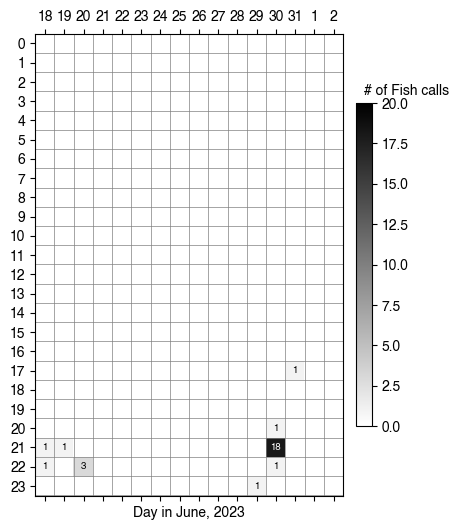

In [6]:
alldf = pd.DataFrame(alldf)

# 解析時間戳
alldf['timestamp'] = pd.to_datetime(alldf['time'])
alldf['date'] = alldf['timestamp'].dt.date
alldf['hour'] = alldf['timestamp'].dt.hour

# 生成一个包含从 2023-06-08 开始的所有日期和小时的完整 DataFrame
start_date = pd.to_datetime('2023-08-18').date()
end_date = datetime(2023,9,2)#alldf['date'].max()
all_dates = pd.date_range(start=start_date, end=end_date, freq='D').date
all_hours = pd.DataFrame([(date, hour) for date in all_dates for hour in range(24)], columns=['date', 'hour'])

# 合并数据，缺失值填充为 0
merged_data = pd.merge(all_hours, alldf.groupby(['date', 'hour']).size().reset_index(name='count'), how='left', on=['date', 'hour'])
merged_data['count'] = merged_data['count'].fillna(0)

# 构建透视表用于热力图
heatmap_data = merged_data.pivot('date', 'hour', 'count').fillna(0)

# 转换成 numpy array 以便于绘图
heatmap_matrix = heatmap_data.to_numpy()

# 绘制 heatmap
plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.matshow(heatmap_matrix.T, cmap='gray_r', vmin=0, vmax=20)
cbar = fig.colorbar(cax, ax=ax, pad=0.02, shrink=0.7)
cbar.ax.set_title('# of Fish calls', ha='left', fontsize=10)

# 设置 x 轴 和 y 轴 的刻度和标签
ax.set_xticks(np.arange(len(heatmap_data.index)))
ax.set_yticks(np.arange(len(heatmap_data.columns)))
ax.set_yticklabels(heatmap_data.columns)
ax.set_xticklabels([date.day for date in heatmap_data.index], rotation=90)

# 设置标签
plt.xlabel('Day in June, 2023')

# 显示数值
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        if int(heatmap_matrix[i, j]) > 0:
            if int(heatmap_matrix[i, j]) > 10:
                color = 'white'
            else:
                color = 'black'
            plt.text(i, j, int(heatmap_matrix[i, j]), ha='center', va='center', color=color, fontsize=7)
        
# 添加网格线

ax.set_yticks(np.arange(-0.51, len(heatmap_data.columns), 1), minor=True)
ax.set_xticks(np.arange(-0.51, len(heatmap_data.index), 1), minor=True)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=0, )
ax.grid(which='minor', color='grey', linestyle='-', linewidth=0.5)
ax.tick_params(which='minor', size=0)



# plt.savefig('../Results/Detection_fishcall/heatmap/Taoyuan_heatmap_202306.png', dpi=300, bbox_inches='tight')
# plt.savefig('../Results/Detection_fishcall/heatmap/Taoyuan_heatmap_202306.pdf', dpi=300, bbox_inches='tight')

In [40]:
place = 'Taoyuan'
path = f'../DataBase/Temperature/{place}'
read_col = ['Time', 'Temp', 'Light']
for filepath in sorted(glob.glob(f'{path}/*xlsx'))[4:5]:
    print(filepath)
    df = pd.read_excel(filepath, header=None, names=read_col, skiprows=1) 

../DataBase/Temperature/Taoyuan/230608-230626.xlsx


In [41]:
np.mean(df['Temp'])

29.127675696634302

In [33]:
sorted(glob.glob(f'{path}/*xlsx'))

['../DataBase/Temperature/Taoyuan/220422-220512.xlsx',
 '../DataBase/Temperature/Taoyuan/220627-220722.xlsx',
 '../DataBase/Temperature/Taoyuan/220808-220824.xlsx',
 '../DataBase/Temperature/Taoyuan/230414-230504.xlsx',
 '../DataBase/Temperature/Taoyuan/230608-230626.xlsx',
 '../DataBase/Temperature/Taoyuan/230818-230915.xlsx',
 '../DataBase/Temperature/Taoyuan/231208-231226.xlsx']